In [1]:
pip install fast-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [3]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, chi2 ,f_classif
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm

In [5]:
loanData = pd.read_csv('DM1 Project/CleanedData/cleanLoanData.csv')
loanData = loanData.drop(columns = ['Unnamed: 0'])

In [6]:
loanData.head()

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DisbursementDuration_days,IsFranchise,SameState,SBA_Gurantee_percent,IsDisbLargerThanGrAppv
0,16,37,45,84,4,2.0,0,0,0,1,60000.0,1.0,0.0,60000.0,48000.0,730.0,0,0,0.80,0
1,16,17,72,60,2,2.0,0,0,0,1,40000.0,1.0,0.0,40000.0,32000.0,92.0,0,0,0.80,0
2,16,17,62,180,7,1.0,0,0,0,0,287000.0,1.0,0.0,287000.0,215250.0,306.0,0,0,0.75,0
3,7,9,33,120,19,1.0,0,0,0,0,517000.0,1.0,0.0,517000.0,387750.0,122.0,0,0,0.75,0
4,10,1,81,84,1,2.0,0,0,0,1,45000.0,1.0,0.0,45000.0,36000.0,487.0,0,0,0.80,0


In [7]:
loanData.columns

Index(['State', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'DisbursementDuration_days',
       'IsFranchise', 'SameState', 'SBA_Gurantee_percent',
       'IsDisbLargerThanGrAppv'],
      dtype='object')

In [8]:
loanData.dtypes

State                          int64
BankState                      int64
NAICS                          int64
Term                           int64
NoEmp                          int64
NewExist                     float64
CreateJob                      int64
RetainedJob                    int64
RevLineCr                      int64
LowDoc                         int64
DisbursementGross            float64
MIS_Status                   float64
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
DisbursementDuration_days    float64
IsFranchise                    int64
SameState                      int64
SBA_Gurantee_percent         float64
IsDisbLargerThanGrAppv         int64
dtype: object

## Fitting without selecting k-best features and without balancing the class

### Splitting into Train-Test-Val

In [9]:
X = loanData.drop(['MIS_Status'], axis = 1)
y = loanData['MIS_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0, shuffle = True)
#Stratified splitting preserves the proportion of splitting

In [10]:
#Train and Validation split from Train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2, random_state = 0, shuffle = True)

In [11]:
#checking shapes of all splitted sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(165491, 19)
(165491,)
(41373, 19)
(41373,)
(51716, 19)
(51716,)


### Pipelines

In [12]:
# Random Forest
pipe_rf  = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state = 0))])

# Decision Tree
pipe_dt  = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 0))])

# Dummy (Baseline)
pipe_dum = Pipeline([('scaler', StandardScaler()), ('clf', DummyClassifier(random_state = 0))])

# K Nearest Neighbors
pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

# Naive Bayes
pipe_nb  = Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())])

# Support Vector Machine
pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC(random_state = 0))])

# Gradient Boosting
pipe_gboost = Pipeline([('scaler', StandardScaler()),('clf', GradientBoostingClassifier(random_state = 0))])

#Logistic Regression
pipe_logistic = Pipeline([('scaler', StandardScaler()),('clf', LogisticRegression(random_state = 0))])

#XGBoost
pipe_xgboost = Pipeline([('scaler', StandardScaler()),('clf', XGBClassifier(random_state = 0))])


In [13]:
pipelines = [pipe_rf, pipe_dt, pipe_dum, 
             pipe_knn, pipe_nb, pipe_svm, pipe_gboost, pipe_xgboost, pipe_logistic]

models = ['RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN', 
          'NaiveBayes',
          'SupportVectorMachine',
          'GradientBoostingClassifier',
          'XGBoostClassifier',
          'LogisticRegression']

# Zipping the the strings and pipelines together and creating a dictionary
model_pipelines = dict(zip(models, pipelines))
model_pipelines

{'RandomForest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', RandomForestClassifier(random_state=0))]),
 'DecisionTree': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier(random_state=0))]),
 'Dummy(Baseline)': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DummyClassifier(random_state=0))]),
 'KNN': Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
 'NaiveBayes': Pipeline(steps=[('scaler', StandardScaler()), ('clf', GaussianNB())]),
 'SupportVectorMachine': Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(random_state=0))]),
 'GradientBoostingClassifier': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', GradientBoostingClassifier(random_state=0))]),
 'XGBoostClassifier': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
            

In [14]:
# Dictionary containing the model names and their scores
models_f1 = {}
classification_reports = {}
classification_reports_test = {}
test_preds = {}

for name, pipe in tqdm(model_pipelines.items()):
    pipe.fit(X_train, y_train)
    
    # Classification Report
    report = metrics.classification_report(y_val, pipe.predict(X_val), output_dict=True)
    f1 = report['macro avg']['f1-score']
    

    # Predicting on Test Set
    test_pred = pipe.predict(X_test)
    
    # Classification Report Test
    report_test = metrics.classification_report(y_test, test_pred, output_dict=True)
    f1_test = report_test['macro avg']['f1-score']

    # Assigning to the Dictionary
    classification_reports[name] = report
    classification_reports_test[name] = report_test
    models_f1[name] = f1

    print('\n'+ name + ' Fitting')
    print(' VAL (Macro Avg - F1 Score): '+ str(f1))
    print(' TEST (Macro Avg - F1 Score): '+ str(f1_test))

 11%|█         | 1/9 [00:19<02:36, 19.61s/it]


RandomForest Fitting
 VAL (Macro Avg - F1 Score): 0.989418948011457
 TEST (Macro Avg - F1 Score): 0.9894455161708773


 22%|██▏       | 2/9 [00:21<01:02,  8.93s/it]


DecisionTree Fitting
 VAL (Macro Avg - F1 Score): 0.9778212688023116
 TEST (Macro Avg - F1 Score): 0.9769472053362855


 33%|███▎      | 3/9 [00:21<00:29,  4.98s/it]


Dummy(Baseline) Fitting
 VAL (Macro Avg - F1 Score): 0.44796989872843473
 TEST (Macro Avg - F1 Score): 0.44796814790303474


 44%|████▍     | 4/9 [01:44<02:59, 35.94s/it]


KNN Fitting
 VAL (Macro Avg - F1 Score): 0.9475067132227015
 TEST (Macro Avg - F1 Score): 0.9472977484275646


 56%|█████▌    | 5/9 [01:45<01:32, 23.12s/it]


NaiveBayes Fitting
 VAL (Macro Avg - F1 Score): 0.8900863458031948
 TEST (Macro Avg - F1 Score): 0.8876537024134923


 67%|██████▋   | 6/9 [08:31<07:39, 153.31s/it]


SupportVectorMachine Fitting
 VAL (Macro Avg - F1 Score): 0.9816954246724621
 TEST (Macro Avg - F1 Score): 0.9823035983342499


 78%|███████▊  | 7/9 [09:09<03:51, 115.86s/it]


GradientBoostingClassifier Fitting
 VAL (Macro Avg - F1 Score): 0.9893793916413225
 TEST (Macro Avg - F1 Score): 0.9894146978081557


 89%|████████▉ | 8/9 [09:37<01:27, 87.72s/it] 


XGBoostClassifier Fitting
 VAL (Macro Avg - F1 Score): 0.9892971711205238
 TEST (Macro Avg - F1 Score): 0.9890007161944718


100%|██████████| 9/9 [09:40<00:00, 64.52s/it]


LogisticRegression Fitting
 VAL (Macro Avg - F1 Score): 0.9771682439177583
 TEST (Macro Avg - F1 Score): 0.9765613884457791


## Fitting without selecting k-best features but balancing the class using class_weight attribute

### Splitting into Train-Test-Val using train_valid_test_split

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = train_valid_test_split(loanData, target = 'MIS_Status',train_size=0.8, valid_size=0.1, test_size=0.1) 

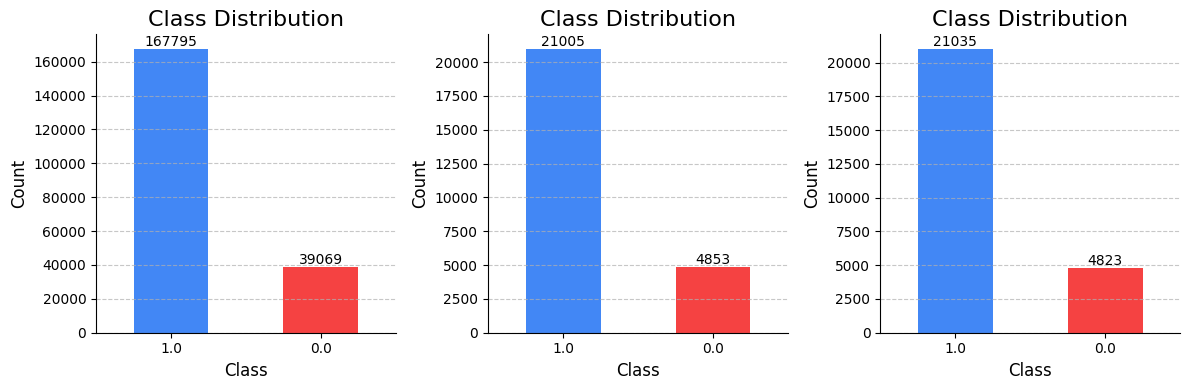

In [ ]:
import matplotlib.pyplot as plt

# Generate the bar plot with customizations
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
colors = ['#4287f5', '#f54242']  # Custom color palette

for i, subplot in enumerate([ax, ax2, ax3]):
    y_values = [y_train, y_val, y_test][i]
    y_values.value_counts().plot(kind='bar', ax=subplot, color=colors)

    # Customize the plot
    subplot.set_title('Class Distribution', fontsize=16)
    subplot.set_xlabel('Class', fontsize=12)
    subplot.set_ylabel('Count', fontsize=12)
    subplot.tick_params(axis='x', rotation=0, labelsize=10)
    subplot.tick_params(axis='y', labelsize=10)
    subplot.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels to the bars
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='center', xytext=(0, 5),
                         textcoords='offset points', fontsize=10, color='black')

    # Remove the spines
    subplot.spines['top'].set_visible(False)
    subplot.spines['right'].set_visible(False)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


This method seems to perform a stratified split inherently, but high samples from class 1, hence a need to perform a balanced fitting

In [ ]:
#checking shapes of all splitted sets
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

206864
25858
25858


### Pipelines

In [ ]:
# Random Forest
pipe_rf  = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state = 0, class_weight='balanced'))])

# Decision Tree
pipe_dt  = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 0, class_weight='balanced'))])

# Dummy (Baseline)
pipe_dum = Pipeline([('scaler', StandardScaler()), ('clf', DummyClassifier(random_state = 0))])

# K Nearest Neighbors
pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

# Support Vector Machine
pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC(random_state = 0, class_weight='balanced'))])

# Gradient Boosting
pipe_gboost = Pipeline([('scaler', StandardScaler()),('clf', GradientBoostingClassifier(random_state = 0))])

# Logistic Regression
pipe_logistic = Pipeline([('scaler', StandardScaler()),('clf', LogisticRegression(random_state = 0, class_weight='balanced'))])

#XGBoost
pipe_xgboost = Pipeline([('scaler', StandardScaler()),('clf', XGBClassifier(random_state = 0))])

In [ ]:
pipelines = [pipe_rf, pipe_dt, pipe_dum, 
             pipe_knn, pipe_svm, pipe_gboost, pipe_logistic, pipe_xgboost]

models = ['RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN',
          'SupportVectorMachine',
          'GradientBoostingClassifier',
          'Logistic Regression',
          'XGBoostClassifier']

# Zipping the the strings and pipelines together and creating a dictionary
model_pipelines = dict(zip(models, pipelines))
model_pipelines

In [ ]:
# Dictionary containing the model names and their scores
models_f1 = {}
classification_reports = {}
classification_reports_test = {}
test_preds = {}

for name, pipe in tqdm(model_pipelines.items()):
    print()
    pipe.fit(X_train, y_train)
    
    # Classification Report
    report = metrics.classification_report(y_val, pipe.predict(X_val), output_dict=True)
    f1 = report['macro avg']['f1-score']
    

    # Predicting on Test Set
    test_pred = pipe.predict(X_test)
    
    # Classification Report Test
    report_test = metrics.classification_report(y_test, test_pred, output_dict=True)
    f1_test = report_test['macro avg']['f1-score']

    # Assigning to the Dictionary
    classification_reports[name] = report
    classification_reports_test[name] = report_test
    models_f1[name] = f1

    print('\n'+ name + ' Fitting')
    print(' VAL (Macro Avg - F1 Score): '+ str(f1))
    print(' TEST (Macro Avg - F1 Score): '+ str(f1_test))

  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:27<02:46, 27.76s/it]


RandomForest Fitting
 VAL (Macro Avg - F1 Score): 0.9891597307447242
 TEST (Macro Avg - F1 Score): 0.9905443314418876



 29%|██▊       | 2/7 [00:29<01:02, 12.54s/it]


DecisionTree Fitting
 VAL (Macro Avg - F1 Score): 0.9785691650349415
 TEST (Macro Avg - F1 Score): 0.9780637046830339



 43%|████▎     | 3/7 [00:29<00:27,  6.97s/it]


Dummy(Baseline) Fitting
 VAL (Macro Avg - F1 Score): 0.4482214113479717
 TEST (Macro Avg - F1 Score): 0.4485744140916555



 57%|█████▋    | 4/7 [01:43<01:40, 33.39s/it]


KNN Fitting
 VAL (Macro Avg - F1 Score): 0.9455313711714599
 TEST (Macro Avg - F1 Score): 0.9510538000213904



 71%|███████▏  | 5/7 [02:31<01:16, 38.40s/it]


GradientBoostingClassifier Fitting
 VAL (Macro Avg - F1 Score): 0.9889708939810714
 TEST (Macro Avg - F1 Score): 0.9905458134179631



 86%|████████▌ | 6/7 [02:34<00:26, 26.46s/it]


Logistic Regression Fitting
 VAL (Macro Avg - F1 Score): 0.9851207488048788
 TEST (Macro Avg - F1 Score): 0.9867407076980756



100%|██████████| 7/7 [03:06<00:00, 26.69s/it]


XGBoostClassifier Fitting
 VAL (Macro Avg - F1 Score): 0.989094533184207
 TEST (Macro Avg - F1 Score): 0.9902876117936387


## Fitting after selecting k-best features and balancing the class using class_weight attribute

### Splitting into Train-Test-Val using train_valid_test_split

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = train_valid_test_split(loanData, target = 'MIS_Status',train_size=0.8, valid_size=0.1, test_size=0.1) 

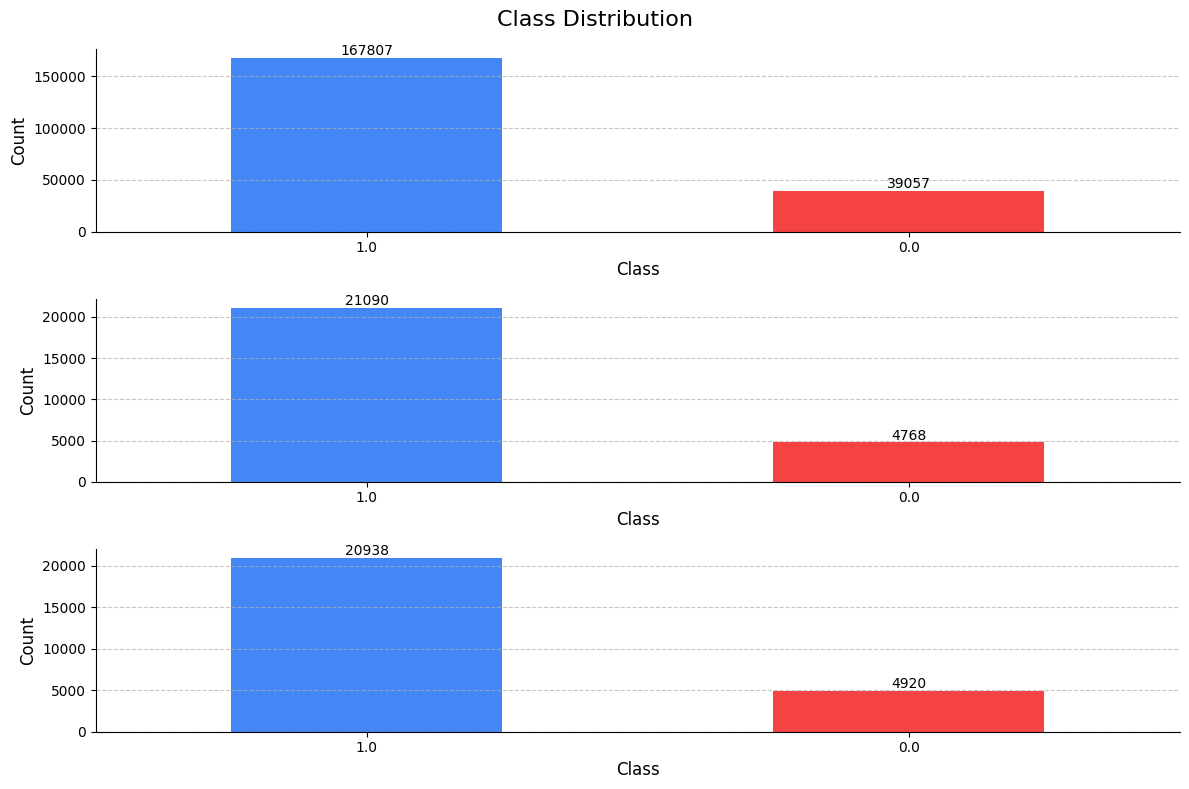

In [ ]:
import matplotlib.pyplot as plt

# Generate the bar plot with customizations
fig, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
colors = ['#4287f5', '#f54242']  # Custom color palette

for i, subplot in enumerate([ax, ax2, ax3]):
    y_values = [y_train, y_val, y_test][i]
    y_values.value_counts().plot(kind='bar', ax=subplot, color=colors)

    # Customize the plot
    subplot.set_xlabel('Class', fontsize=12)
    subplot.set_ylabel('Count', fontsize=12)
    subplot.tick_params(axis='x', rotation=0, labelsize=10)
    subplot.tick_params(axis='y', labelsize=10)
    subplot.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels to the bars
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='center', xytext=(0, 5),
                         textcoords='offset points', fontsize=10, color='black')

    # Remove the spines
    subplot.spines['top'].set_visible(False)
    subplot.spines['right'].set_visible(False)

# Set a common title for all subplots
fig.suptitle('Class Distribution', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


This method seems to perform a stratified split inherently, but high samples from class 1, hence a need to perform a balanced fitting

In [ ]:
#checking shapes of all splitted sets
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

206864
25858
25858


### Scaling the dataset for feature importance selections

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_val_scaled = scaler.transform(X_val)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns)

### Selecting K-Best features

In [ ]:
bestfeatures = SelectKBest(score_func = f_classif, k='all') #using f_classif instead of chi2 to handle negative feature values as well
fit = bestfeatures.fit(X_train, y_train)
feature_score_dict = dict(zip(X_train.columns,fit.scores_.round(6)))
feature_score_dict = sorted(feature_score_dict.items(), key=lambda kv: kv[1],reverse=True)
feature_score_dict

[('ChgOffPrinGr', 59795.811819),
 ('Term', 40382.664481),
 ('SBA_Gurantee_percent', 9703.428873),
 ('IsDisbLargerThanGrAppv', 4636.650573),
 ('DisbursementDuration_days', 2808.6679),
 ('LowDoc', 2764.145824),
 ('SBA_Appv', 2209.275074),
 ('GrAppv', 1535.642059),
 ('RevLineCr', 1414.035621),
 ('DisbursementGross', 981.887739),
 ('SameState', 669.63572),
 ('State', 668.465885),
 ('BankState', 467.813103),
 ('RetainedJob', 205.08563),
 ('NoEmp', 108.854012),
 ('NewExist', 34.473968),
 ('IsFranchise', 32.175465),
 ('NAICS', 3.539375),
 ('CreateJob', 2.742331)]

features such as
 ('RetainedJob', 203.337743),
 ('NoEmp', 101.76103),
 ('NewExist', 46.527694),
 ('IsFranchise', 37.462995),
 ('NAICS', 8.910066),
 ('CreateJob', 2.287598) are very less scored in comparison to rest so we can try by dropping these

In [ ]:
loan_data_fdrop = loanData.drop(['BankState','State','RetainedJob','NoEmp','NewExist','IsFranchise','NAICS','CreateJob'], axis = 1)

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = train_valid_test_split(loan_data_fdrop, target = 'MIS_Status',train_size=0.8, valid_size=0.1, test_size=0.1) 

### Pipelines

In [ ]:
# Random Forest
pipe_rf  = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state = 0, class_weight='balanced'))])

# Decision Tree
pipe_dt  = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 0, class_weight='balanced'))])

# Dummy (Baseline)
pipe_dum = Pipeline([('scaler', StandardScaler()), ('clf', DummyClassifier(random_state = 0))])

# K Nearest Neighbors
pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

# Support Vector Machine
pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC(random_state = 0, class_weight='balanced'))])

# Gradient Boosting
pipe_gboost = Pipeline([('scaler', StandardScaler()),('clf', GradientBoostingClassifier(random_state = 0))])

# Logistic Regression
pipe_logistic = Pipeline([('scaler', StandardScaler()),('clf', LogisticRegression(random_state = 0, class_weight='balanced'))])

#XGBoost
pipe_xgboost = Pipeline([('scaler', StandardScaler()),('clf', XGBClassifier(random_state = 0))])

In [ ]:
pipelines = [pipe_rf, pipe_dt, pipe_dum, 
             pipe_knn, pipe_svm, pipe_gboost, pipe_logistic, pipe_xgboost]

models = ['RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN',
          'SupportVectorMachine',
          'GradientBoostingClassifier',
          'Logistic Regression',
          'XGBoostClassifier']

# Zipping the the strings and pipelines together and creating a dictionary
model_pipelines = dict(zip(models, pipelines))
model_pipelines

In [ ]:
# Dictionary containing the model names and their scores
models_f1 = {}
classification_reports = {}
classification_reports_test = {}
test_preds = {}

for name, pipe in tqdm(model_pipelines.items()):
    print()
    pipe.fit(X_train, y_train)
    
    # Classification Report
    report = metrics.classification_report(y_val, pipe.predict(X_val), output_dict=True)
    f1 = report['macro avg']['f1-score']
    

    # Predicting on Test Set
    test_pred = pipe.predict(X_test)
    
    # Classification Report Test
    report_test = metrics.classification_report(y_test, test_pred, output_dict=True)
    f1_test = report_test['macro avg']['f1-score']

    # Assigning to the Dictionary
    classification_reports[name] = report
    classification_reports_test[name] = report_test
    models_f1[name] = f1

    print('\n'+ name + ' Fitting')
    print(' VAL (Macro Avg - F1 Score): '+ str(f1))
    print(' TEST (Macro Avg - F1 Score): '+ str(f1_test))

  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:21<02:07, 21.33s/it]


RandomForest Fitting
 VAL (Macro Avg - F1 Score): 0.9893427700229676
 TEST (Macro Avg - F1 Score): 0.9906537053919553



 29%|██▊       | 2/7 [00:22<00:48,  9.74s/it]


DecisionTree Fitting
 VAL (Macro Avg - F1 Score): 0.9767574481927522
 TEST (Macro Avg - F1 Score): 0.9813232405206265



 43%|████▎     | 3/7 [00:23<00:21,  5.41s/it]


Dummy(Baseline) Fitting
 VAL (Macro Avg - F1 Score): 0.4477736252002135
 TEST (Macro Avg - F1 Score): 0.44762026830727164



 57%|█████▋    | 4/7 [00:47<00:38, 12.69s/it]


KNN Fitting
 VAL (Macro Avg - F1 Score): 0.980138425247033
 TEST (Macro Avg - F1 Score): 0.9837743682023883



 71%|███████▏  | 5/7 [01:23<00:42, 21.17s/it]


GradientBoostingClassifier Fitting
 VAL (Macro Avg - F1 Score): 0.9894107833456284
 TEST (Macro Avg - F1 Score): 0.9907839800195273



 86%|████████▌ | 6/7 [01:24<00:14, 14.45s/it]


Logistic Regression Fitting
 VAL (Macro Avg - F1 Score): 0.985327196923421
 TEST (Macro Avg - F1 Score): 0.987472752825602



100%|██████████| 7/7 [01:53<00:00, 16.19s/it]


XGBoostClassifier Fitting
 VAL (Macro Avg - F1 Score): 0.9893444062824924
 TEST (Macro Avg - F1 Score): 0.99065513977624
